<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/Imagenette_VGG_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [1]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
# import necessary dependancies
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

## Get the Imagenette dataset

In [3]:
# since the images are of size[3, x, 500] where x is of variable height, we need to transform it
from torchvision.transforms import Compose, Pad, Resize, ToTensor
transform = Compose([
    Resize((64,64)),
    ToTensor()
])

In [4]:
from pathlib import Path
DATASET_PATH = Path( "/content/data")
# DATASET_PATH.exists()
if DATASET_PATH.exists():
    # setup training data
    TRAIN_DATA = datasets.Imagenette(
        root="data",
        split="train",
        download=False,
        transform=transform,
        target_transform=None
    )
    # setup testing data
    TEST_DATA = datasets.Imagenette(
        root="data",
        split="val",
        download=False,
        transform=transform
    )
else:
    # setup training data
    TRAIN_DATA = datasets.Imagenette(
        root="data",
        split="train",
        download=True,
        transform=transform,
        target_transform=None
    )
    # setup testing data
    TEST_DATA = datasets.Imagenette(
        root="data",
        split="val",
        download=False,
        transform=transform
    )

100%|██████████| 1557161267/1557161267 [00:42<00:00, 36635671.24it/s]


Extracting data/imagenette2.tgz to data


In [5]:
# visualize length of training and tsting data
len(TRAIN_DATA), len(TEST_DATA)

(9469, 3925)

In [6]:
TRAIN_DATA[900]

(tensor([[[0.4471, 0.4784, 0.4941,  ..., 0.4353, 0.4588, 0.4157],
          [0.4627, 0.4941, 0.5451,  ..., 0.4824, 0.4627, 0.4314],
          [0.4588, 0.4863, 0.5020,  ..., 0.5020, 0.4549, 0.4275],
          ...,
          [0.2549, 0.3059, 0.2627,  ..., 0.3922, 0.4627, 0.4235],
          [0.3373, 0.3137, 0.2118,  ..., 0.4275, 0.4392, 0.4157],
          [0.3294, 0.3294, 0.2314,  ..., 0.3765, 0.3451, 0.3059]],
 
         [[0.4039, 0.4353, 0.4353,  ..., 0.5059, 0.5137, 0.4902],
          [0.4196, 0.4471, 0.4902,  ..., 0.5333, 0.5255, 0.5059],
          [0.4235, 0.4549, 0.4863,  ..., 0.5333, 0.5216, 0.4980],
          ...,
          [0.2980, 0.3490, 0.3137,  ..., 0.4157, 0.4706, 0.4353],
          [0.3843, 0.3647, 0.2745,  ..., 0.4510, 0.4510, 0.4314],
          [0.3804, 0.3804, 0.2941,  ..., 0.4000, 0.3569, 0.3569]],
 
         [[0.1922, 0.2118, 0.2353,  ..., 0.2039, 0.1961, 0.1529],
          [0.2039, 0.2314, 0.2941,  ..., 0.2353, 0.2039, 0.1647],
          [0.2078, 0.2275, 0.2471,  ...,

torch.Size([3, 64, 64]) 1


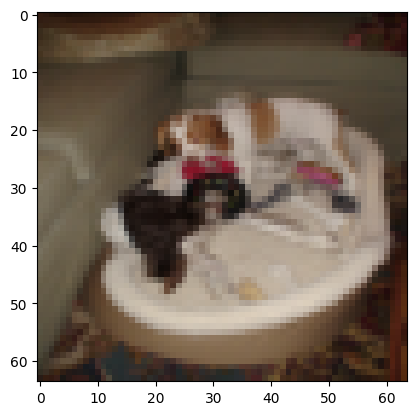

In [7]:
img,label = TRAIN_DATA[1000]

print(img.shape,label)
plt.imshow(img.permute(1,2,0))

# permute is used to change the tensor from [rgb, height, width] to [height, width, rgb]

In [8]:
# visualize classes
# labels = TRAIN_DATA.targets
# print(labels.unique())
CLASS_NAMES = TRAIN_DATA.classes
CLASS_NAMES


[('tench', 'Tinca tinca'),
 ('English springer', 'English springer spaniel'),
 ('cassette player',),
 ('chain saw', 'chainsaw'),
 ('church', 'church building'),
 ('French horn', 'horn'),
 ('garbage truck', 'dustcart'),
 ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'),
 ('golf ball',),
 ('parachute', 'chute')]

In [9]:
# label the classes correctly
TRAIN_DATA.classes = ['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']
TEST_DATA.classes = ['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']
print(TRAIN_DATA.classes)
print(TEST_DATA.classes)

['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']
['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']


In [10]:
len(TRAIN_DATA.class_to_idx), TRAIN_DATA.class_to_idx

(20,
 {'tench': 0,
  'Tinca tinca': 0,
  'English springer': 1,
  'English springer spaniel': 1,
  'cassette player': 2,
  'chain saw': 3,
  'chainsaw': 3,
  'church': 4,
  'church building': 4,
  'French horn': 5,
  'horn': 5,
  'garbage truck': 6,
  'dustcart': 6,
  'gas pump': 7,
  'gasoline pump': 7,
  'petrol pump': 7,
  'island dispenser': 7,
  'golf ball': 8,
  'parachute': 9,
  'chute': 9})

## Prepare the DataLoader

In [11]:
from torch.utils.data import DataLoader
# batching up the images into 32/batch
BATCH_SIZE = 32
classes = ['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']

# Turn datasets into iterables
train_dataloader = DataLoader(
    TRAIN_DATA,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = DataLoader(
    TEST_DATA,
    batch_size=BATCH_SIZE,
    shuffle=False
)

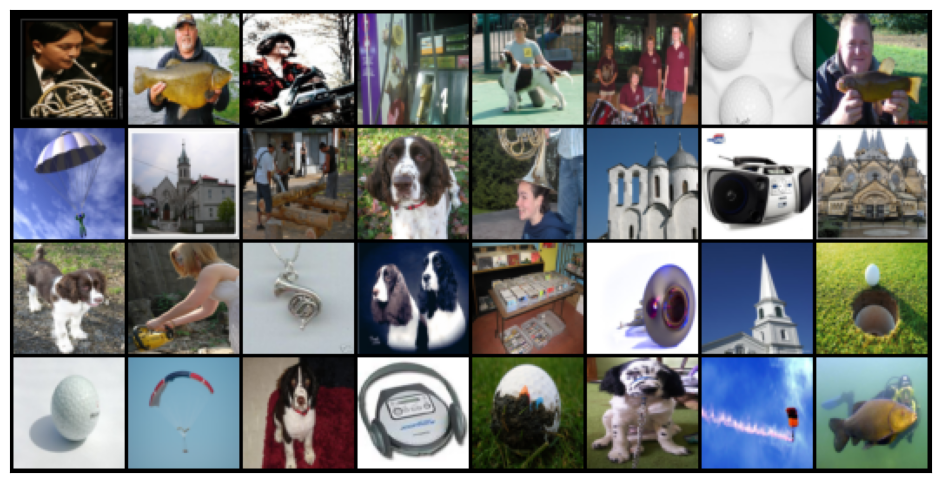

In [12]:
from torchvision.utils import make_grid
# visualize batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))

for img, label in train_dataloader:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(img, nrow=8).permute(1,2,0))
    plt.show()
    break


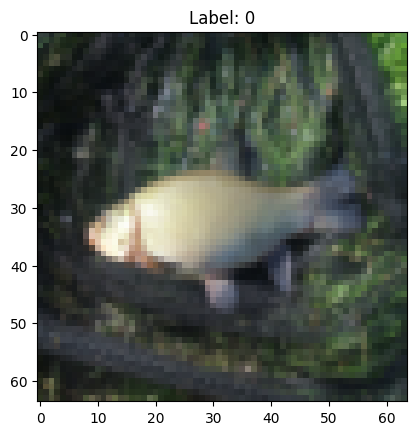

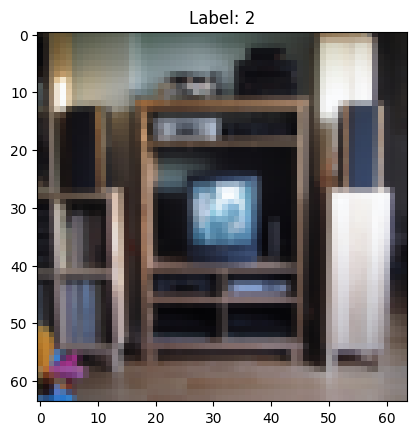

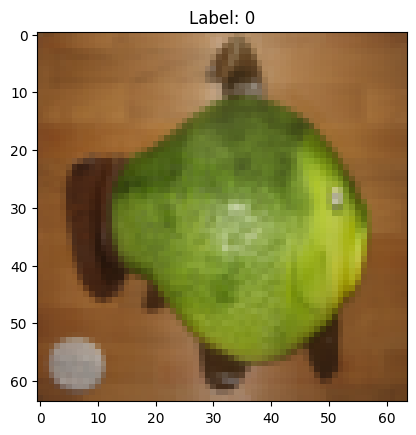

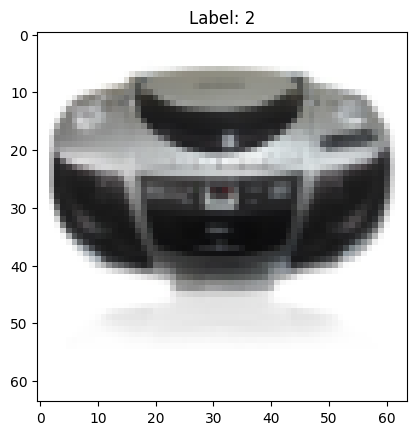

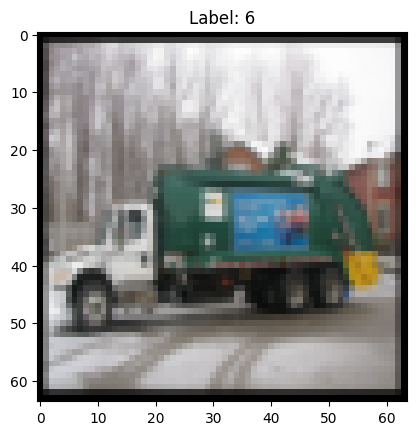

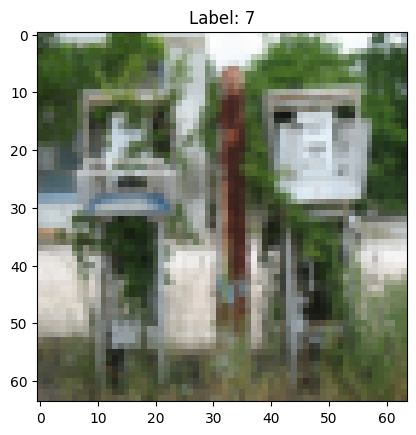

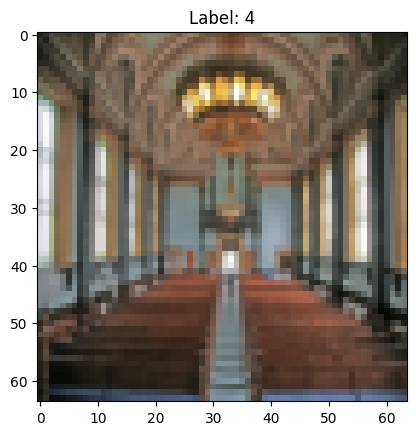

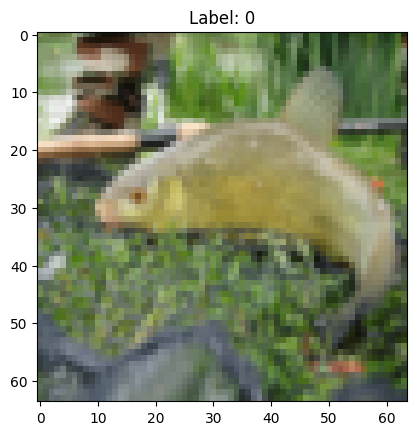

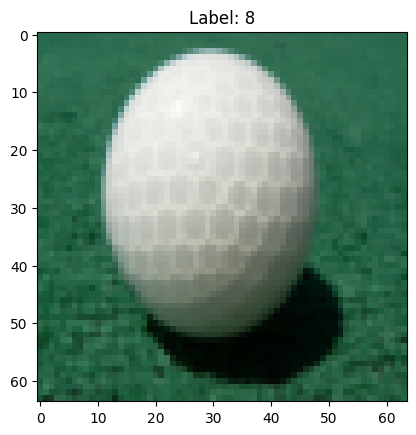

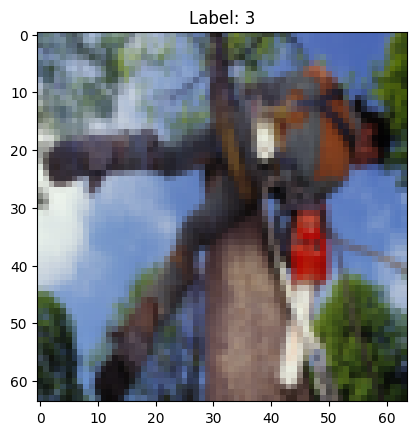

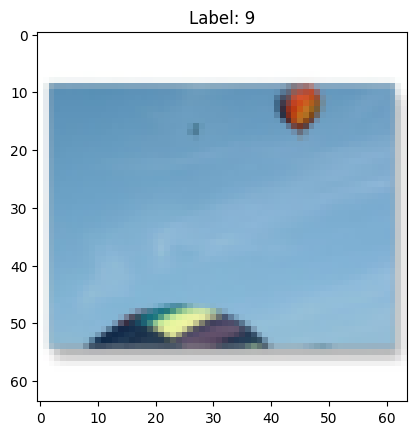

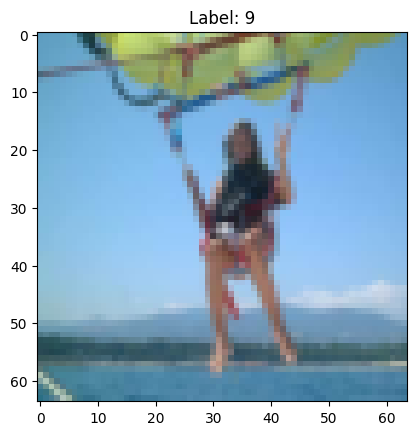

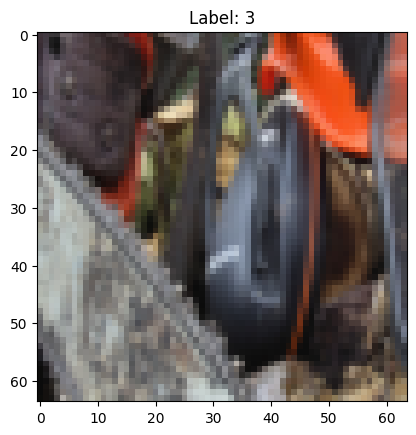

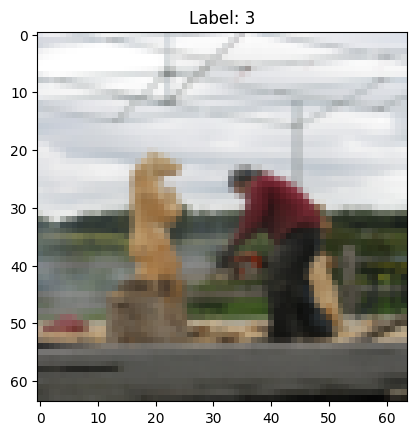

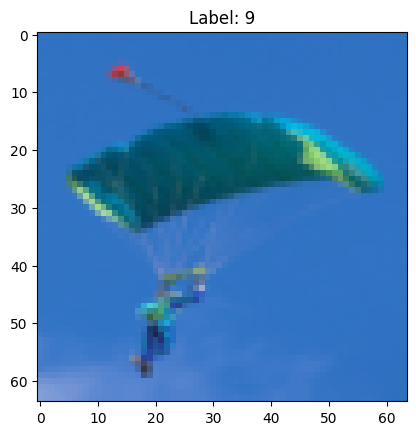

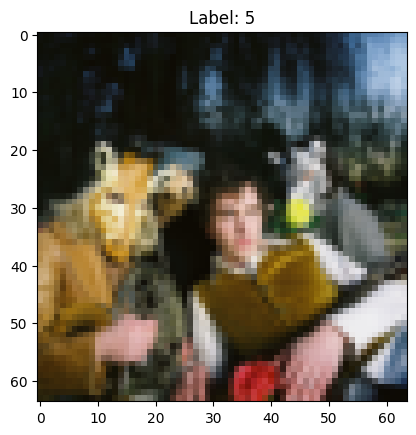

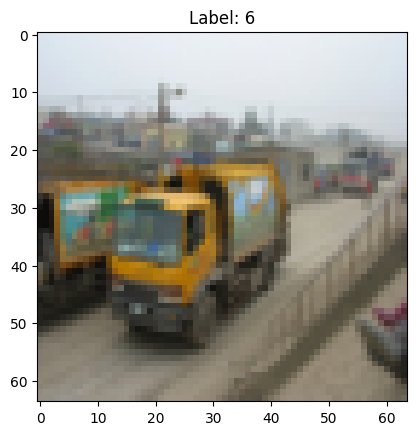

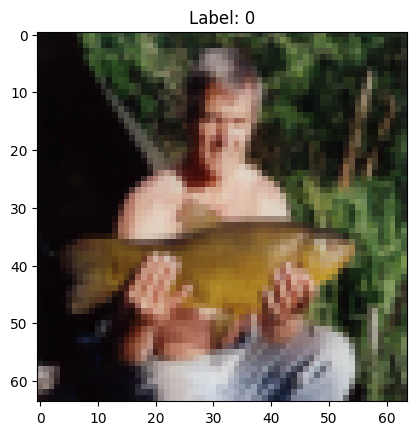

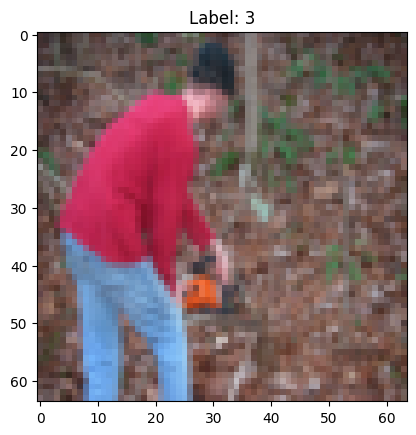

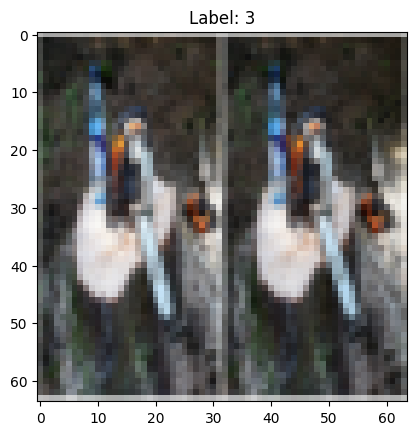

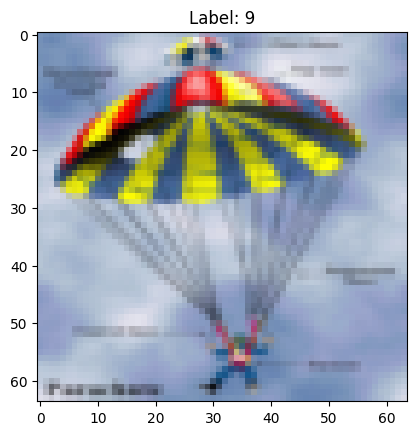

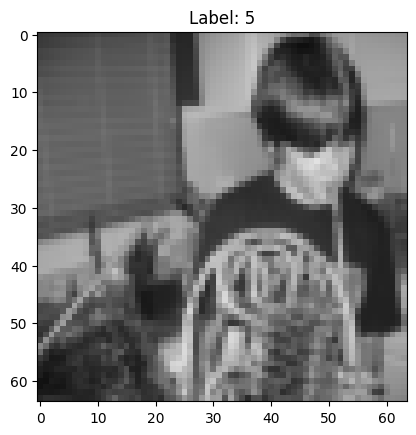

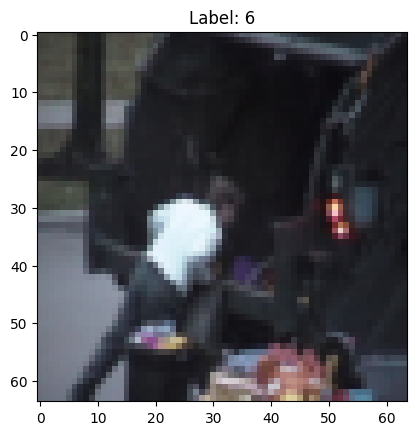

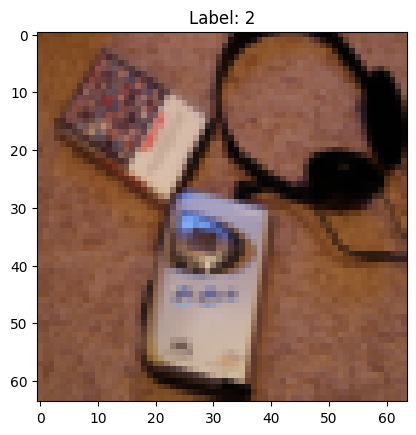

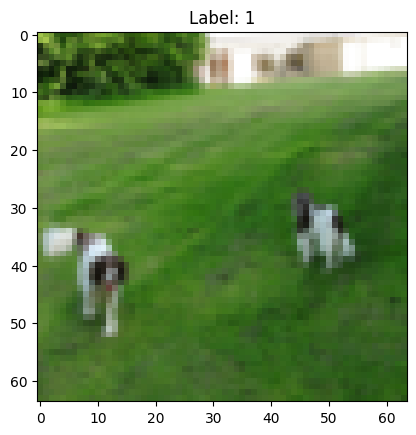

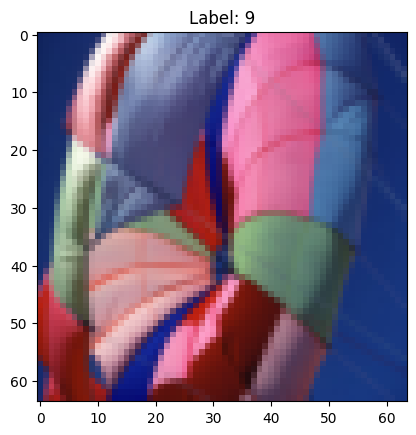

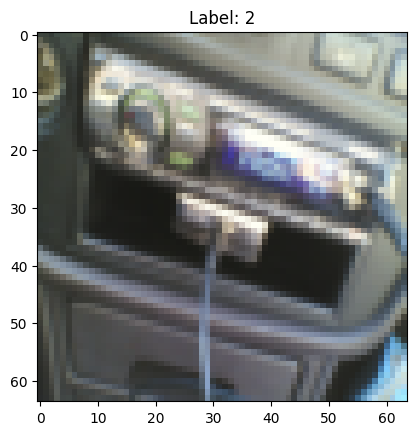

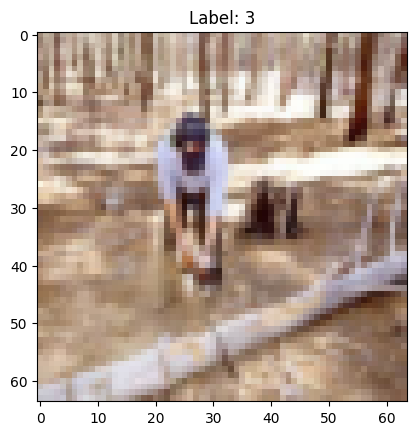

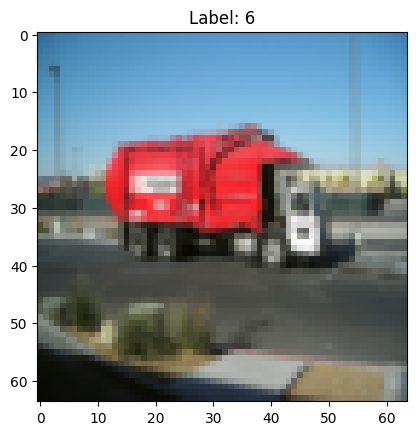

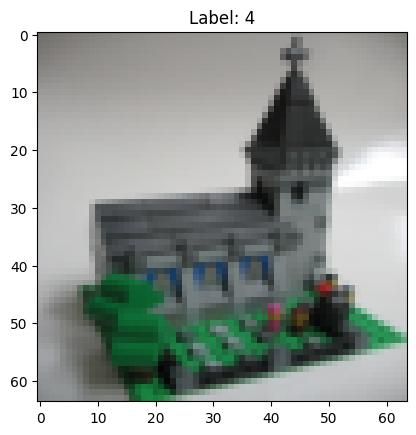

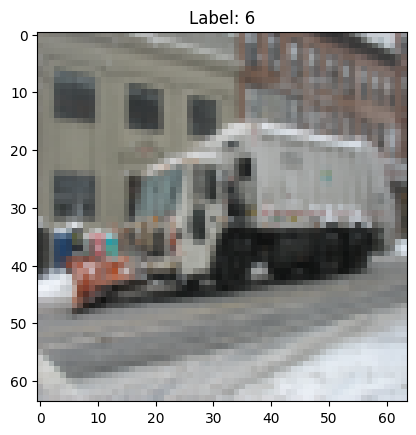

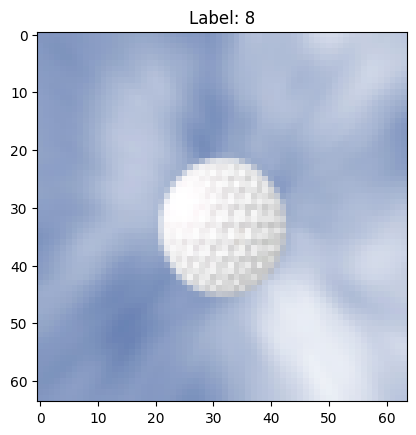

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_dataloader is your DataLoader object

# Get a batch of data
for batch_idx, (X_batch, y_batch) in enumerate(train_dataloader):
    # Visualize a sample from the batch
    for i in range(len(X_batch)):
        image = X_batch[i]  # Assuming image is a tensor
        label = y_batch[i]  # Assuming label is a tensor or scalar

        # Convert tensor to numpy array and transpose if necessary
        image = image.numpy() if isinstance(image, torch.Tensor) else image
        label = label.numpy() if isinstance(label, torch.Tensor) else label

        # Visualize the image and label
        plt.imshow(image.transpose(1, 2, 0))  # Transpose if necessary (channels last)
        plt.title(f"Label: {label}")
        plt.show()

    # Break after visualizing the first batch
    break


In [14]:
for batch_idx, (X_batch, y_batch) in enumerate(train_dataloader):
    print((len(y_batch)))
    break

32


## Building model_vgg using nn.conv2d() and nn.MaxPool2d() layers

source: ![picture](https://miro.medium.com/v2/resize:fit:700/1*few2VVEzn6DMVX-kofszhA.png?raw=True)
 ![picture](https://miro.medium.com/v2/resize:fit:700/1*VPm-hHOM14OisbFUU4cL6Q.png)

In [15]:
# create a convolutional neural network
class ImagenetteModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*2*2,
                      out_features=hidden_units*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden_units*2*2,
                      out_features=hidden_units*2),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden_units*2,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print("block_1", x.shape)
        x = self.block_2(x)
        # print("block_2", x.shape)
        x = self.block_3(x)
        # print("block_3", x.shape)
        x = self.block_4(x)
        # print("block_4", x.shape)
        x = self.block_5(x)
        # print("block_5", x.shape)
        x = self.classifier(x)
        # print("classifier", x.shape)
        return x




In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
model_0 = ImagenetteModelV0(
    input_shape=3,
    hidden_units=10,
    output_shape=len(CLASS_NAMES)
).to(device)
model_0

ImagenetteModelV0(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [21]:
rand_img_tensor = torch.rand(size=(3,64,64)).to(device)
rand_img_tensor.shape

torch.Size([3, 64, 64])

In [22]:
model_0(rand_img_tensor.unsqueeze(0))

# """
# block_1 torch.Size([1, 16, 128, 128])
# block_2 torch.Size([1, 16, 64, 64])
# block_3 torch.Size([1, 16, 32, 32])
# block_4 torch.Size([1, 16, 16, 16])
# block_5 torch.Size([1, 16, 8, 8])
# classifier torch.Size([1, 10])
# tensor([[-0.0477, -0.0306, -0.0561, -0.0896, -0.0768, -0.0572, -0.0447, -0.0345,
#           0.0323,  0.0075]], grad_fn=<AddmmBackward0>)

# """

tensor([[ 0.0893,  0.0143, -0.0824,  0.0790, -0.0359,  0.0598,  0.0198,  0.0216,
          0.0973,  0.0972]], device='cuda:0', grad_fn=<AddmmBackward0>)

## Set up Loss function and optimizer for model_0

In [23]:
model_0.parameters()

<generator object Module.parameters at 0x796351490200>

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


## setup device agnostic code

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [26]:
# Accuracy function
import torchmetrics
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass",
                       num_classes=len(CLASS_NAMES)).to(device)

## set up training and testing steps


In [27]:
for batch, (X, y) in enumerate(train_dataloader):
    print(batch)
    print((X,y))
    break

0
(tensor([[[[0.2431, 0.2431, 0.2431,  ..., 0.2392, 0.2392, 0.2392],
          [0.2431, 0.2431, 0.2431,  ..., 0.2353, 0.2353, 0.2392],
          [0.2353, 0.2392, 0.2431,  ..., 0.2353, 0.2353, 0.2353],
          ...,
          [0.2196, 0.2196, 0.2157,  ..., 0.2549, 0.2510, 0.2118],
          [0.2157, 0.2157, 0.2157,  ..., 0.2706, 0.2510, 0.2039],
          [0.2157, 0.2118, 0.2157,  ..., 0.2510, 0.2275, 0.2039]],

         [[0.0549, 0.0510, 0.0549,  ..., 0.0471, 0.0471, 0.0471],
          [0.0549, 0.0510, 0.0549,  ..., 0.0471, 0.0471, 0.0471],
          [0.0471, 0.0510, 0.0549,  ..., 0.0431, 0.0431, 0.0431],
          ...,
          [0.0275, 0.0275, 0.0235,  ..., 0.0706, 0.0627, 0.0196],
          [0.0235, 0.0196, 0.0235,  ..., 0.0784, 0.0588, 0.0157],
          [0.0196, 0.0196, 0.0235,  ..., 0.0588, 0.0353, 0.0157]],

         [[0.0157, 0.0118, 0.0157,  ..., 0.0196, 0.0157, 0.0157],
          [0.0157, 0.0118, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0078, 0.0118, 0.0157,  ...

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    """
    Performs a single training step on the provided model using the given data loader.

    Args:
        model (torch.nn.Module): The model to be trained.
        data_loader (torch.utils.data.DataLoader): DataLoader providing the training data.
        loss_fn (torch.nn.Module): Loss function to calculate the loss.
        optimizer (torch.optim.Optimizer): Optimizer to update model parameters.
        accuracy_fn (callable): Function to calculate the accuracy, takes y_true and y_pred as inputs.
        device (torch.device, optional): Device on which to perform training (default is CUDA if available).

    Returns:
        None
    """

    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(preds=y_pred.argmax(dim=1), target=y) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    """
    Performs a single evaluation step on the provided model using the given data loader.

    Args:
        data_loader (torch.utils.data.DataLoader): DataLoader providing the test/validation data.
        model (torch.nn.Module): The model to be evaluated.
        loss_fn (torch.nn.Module): Loss function to calculate the loss.
        accuracy_fn (callable): Function to calculate the accuracy, takes y_true and y_pred as inputs.
        device (torch.device, optional): Device on which to perform evaluation (default is CUDA if available).

    Returns:
        None
    """


    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(preds=test_pred.argmax(dim=1), target=y)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [29]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
torch.manual_seed(42)

# Import tqdm for progress bar
from tqdm.auto import tqdm
#measure time
from timeit import default_timer as timer
train_time_start_model_0 = timer()

# train and test the model
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        model=model_0,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(
        model=model_0,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_0 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_0,
                                            end=train_time_end_model_0,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 2.30415 | Train accuracy: 0.10%
Test loss: 2.30443 | Test accuracy: 0.10%

Epoch: 1
---------
Train loss: 2.30303 | Train accuracy: 0.10%
Test loss: 2.30460 | Test accuracy: 0.09%

Epoch: 2
---------
Train loss: 2.30317 | Train accuracy: 0.10%
Test loss: 2.30461 | Test accuracy: 0.09%

Epoch: 3
---------
Train loss: 2.30316 | Train accuracy: 0.10%
Test loss: 2.30408 | Test accuracy: 0.10%

Epoch: 4
---------
Train loss: 2.30302 | Train accuracy: 0.10%
Test loss: 2.30372 | Test accuracy: 0.10%

Epoch: 5
---------
Train loss: 2.30316 | Train accuracy: 0.10%
Test loss: 2.30391 | Test accuracy: 0.10%

Epoch: 6
---------
Train loss: 2.30320 | Train accuracy: 0.10%
Test loss: 2.30412 | Test accuracy: 0.09%

Epoch: 7
---------
Train loss: 2.30320 | Train accuracy: 0.10%
Test loss: 2.30414 | Test accuracy: 0.10%

Epoch: 8
---------
Train loss: 2.30310 | Train accuracy: 0.10%
Test loss: 2.30425 | Test accuracy: 0.09%

Epoch: 9
---------
Train loss: 2.30311 | Train

In [ ]:
# since our loss is stuck, we can try the following
